# Pymaceuticals Inc.
---

### Analysis

Background
- This evaluation was looking at the effectiveness of 9 drug regimines (plus one group that got the placebo) for treating Squamous Cell Carcinoma over a 45 day time period. This study was comprised of 249 mice (reduced to 248 mice once duplicates were removed). The gener of the mice was evenly distributed.


Findings
- The correlation between mouse weight and average tumor volume was 0.84, which shows a strong positive correlation. 
- For the drugs chosen to review in this study, Capomulin and Ramicane were the most effective drugs. These drugs have the lowest means, medians, variances and standard deviations. 
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [35]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].nunique()
mice

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Clarification from Learning Assistant: Use the .duplicated() method and then there is a parameter called 
# subset in that method where you will use a list of the columns that you are looking for duplicate entries in 

duplicates =combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_data.loc[(combined_data["Mouse ID"] == "g989")]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_final = combined_data[combined_data["Mouse ID"].isin(duplicates)==False]
mice_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [40]:
# Checking the number of mice in the clean DataFrame.
total_mice = mice_final["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = mice_final.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_median = mice_final.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_variance = mice_final.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_std = mice_final.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem = mice_final.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_drug = pd.DataFrame({"Mean Tumor Volume": drug_mean, 
                             "Median Tumor Volume": drug_median, 
                             "Tumor Volume Variance": drug_variance, 
                             "Tumor Volume Std. Dev.": drug_std, 
                             "Tumor Volume Std. Err.": drug_sem})
summary_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_data = mice_final.groupby("Drug Regimen")
agg_table = agg_data.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
agg_table

C:\Users\ljord\AppData\Local\Temp\ipykernel_16240\730156656.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_table = agg_data.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

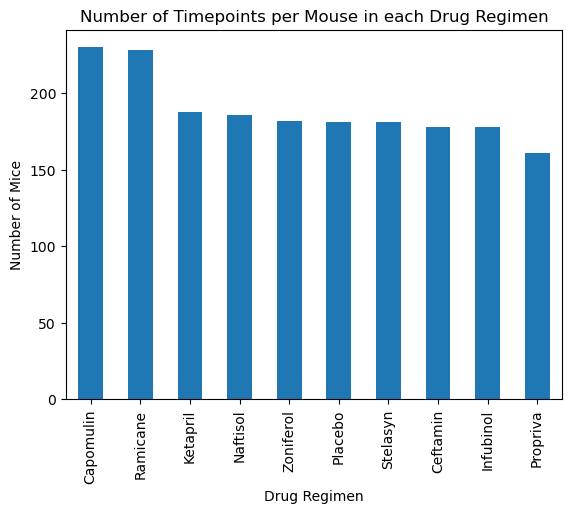

<Figure size 640x480 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Step 1: Get mouse count for y-axis
count_drug = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Step 2: Sort Values to get graph into descending order
count_drug_ordered = count_drug.sort_values(ascending=False)

# Step 3: Create graph
count_regimen = count_drug_ordered.plot(kind="bar")
count_regimen.set_title("Number of Timepoints per Mouse in each Drug Regimen")
count_regimen.set_xlabel("Drug Regimen")
count_regimen.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

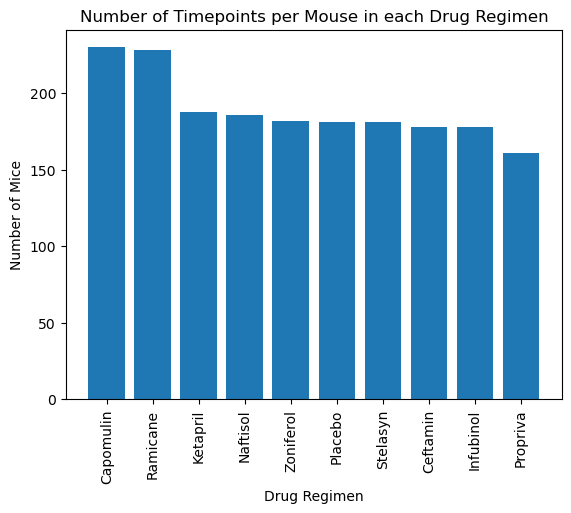

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_pyplot = np.arange(len(count_drug_ordered))
y_pyplot = count_drug_ordered

tick = list(count_drug_ordered.index.values)
tick_location = [value for value in x_pyplot]

plt.bar(x_pyplot, y_pyplot)
plt.xticks(tick_location, tick, rotation="90")
plt.title("Number of Timepoints per Mouse in each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

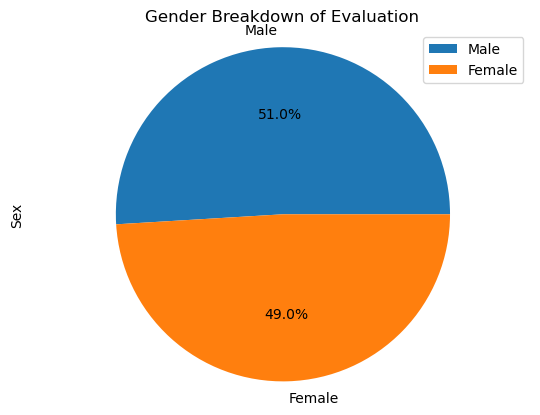

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = pd.DataFrame(mice_final["Sex"].value_counts())
mice_gender.plot(kind="pie", y="Sex", title=("Gender Breakdown of Evaluation"), autopct="%1.1f%%")
plt.axis("equal")
plt.show()

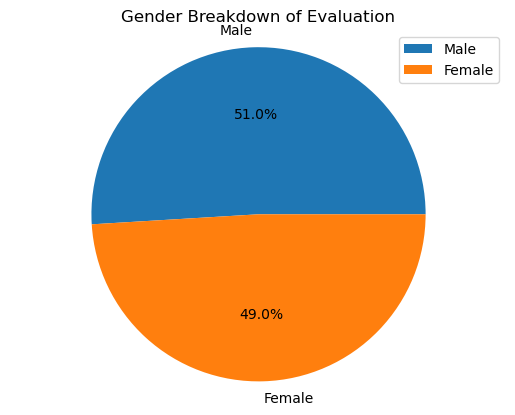

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = mice_final["Sex"].value_counts()
labels = list(mice_gender.index)
plt.pie(mice_gender, labels=labels, autopct="%1.1f%%")
plt.title("Gender Breakdown of Evaluation")
plt.legend(labels, loc="upper right")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mice_final.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge = pd.merge(last_timepoint, mice_final, on=(["Mouse ID", "Timepoint"]))
final_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]  

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for drug in treatment:
    volume = final_merge.loc[final_merge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)

quartile = volume.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper-lower

# Determine outliers using upper and lower bounds
lower_bound = lower-(1.5*iqr)
upper_bound = upper+(1.5*iqr)
outliers=volume.loc[(volume>upper_bound) | (volume<lower_bound)]  

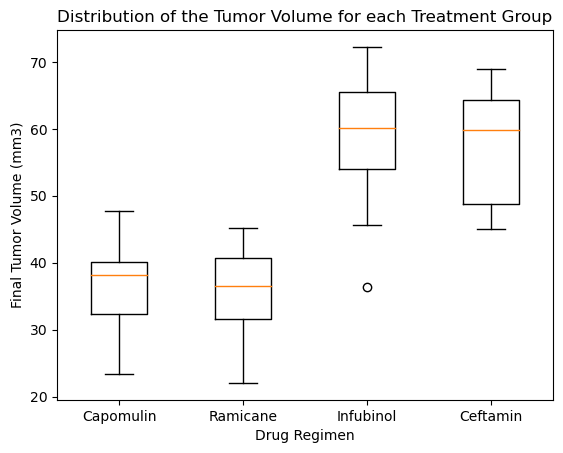

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of the Tumor Volume for each Treatment Group")
plt.boxplot(tumor_volume, labels = treatment)
plt.show()

## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Step 1: See which mice were treated with Capomulin
capomulin_list = mice_final.loc[mice_final["Drug Regimen"] == "Capomulin"]
capomulin_list.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

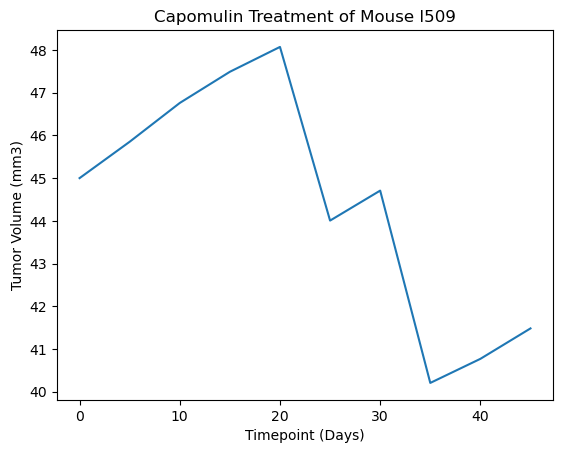

In [51]:
# Step 2: Choose Mouse ID on list
l509 = mice_final.loc[mice_final["Mouse ID"] == "l509"]

# Step 3: Create line plot of tumor volume vs. time point for l509
x=l509["Timepoint"]
y=l509["Tumor Volume (mm3)"]

plt.plot(x, y, label="Mouse ID l509")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

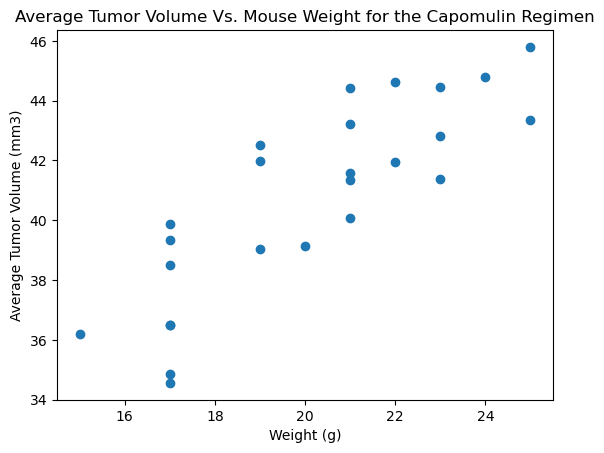

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Step 1: Calculate average tumor volume and average mouse weight for mice on Capomulin reginmen
mouse_data = capomulin_list.groupby("Mouse ID")
mouse_volume = mouse_data["Tumor Volume (mm3)"].mean()
mouse_weight = mouse_data["Weight (g)"].mean()
scatter_data = pd.DataFrame({"Weight (g)": mouse_weight,
                            "Tumor Volume (mm3)": mouse_volume})

# Step 2: Create Scatter Plot
x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o")
plt.title("Average Tumor Volume Vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


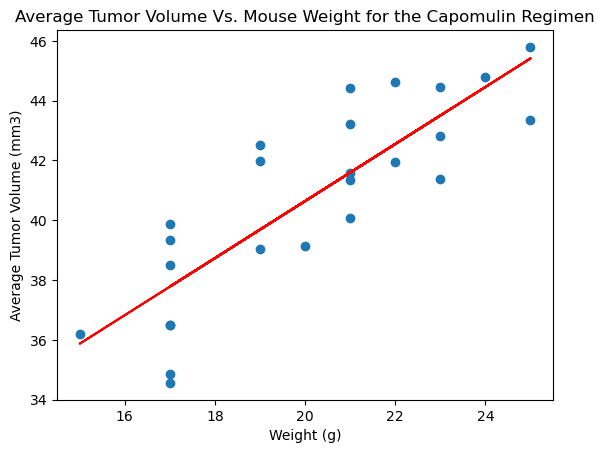

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set x and y axes
x_axis = scatter_data["Weight (g)"]
y_axis = scatter_data["Tumor Volume (mm3)"]

# Calculate Regression line 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept

# Create Graph - Scatter and Line
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Average Tumor Volume Vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(x_axis, regress,"r-")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")